In [21]:
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import matplotlib.pyplot as plt
from pyvis import network as net
import pandas as pd
from IPython.display import HTML, Image, Latex, Math, Markdown, SVG, JSON

In [9]:
G = nx.read_gpickle("/Users/martin/Dropbox/Development/keboola_dbt_beer_demo_datafold/target/graph.gpickle")

In [4]:
G

In [38]:
print(G.nodes)
print("\n")
print(G.out_edges)
print("\n")
print(G.in_edges)

['test.beer_analytics.assert_ibu_0_100_range', 'model.beer_analytics.beers', 'seed.beer_analytics.seed_breweries', 'seed.beer_analytics.seed_beers', 'model.beer_analytics.promo_deliveries', 'model.beer_analytics.orders', 'model.beer_analytics.order_lines', 'model.beer_analytics.sales', 'model.beer_analytics.beers_with_breweries', 'model.beer_analytics.breweries', 'test.beer_analytics.not_null_sales_order_no.2f24730369', 'test.beer_analytics.not_null_sales_order_line.254f52e82a', 'test.beer_analytics.not_null_beers_with_breweries_brewery_id.1725a2e6dc', 'test.beer_analytics.unique_beers_with_breweries_beer_id.aeaa7c6743', 'test.beer_analytics.not_null_beers_with_breweries_beer_id.06c4b94123', 'test.beer_analytics.unique_beers_beer_id.594ed33081', 'test.beer_analytics.not_null_beers_beer_id.efaf5f5466', 'test.beer_analytics.relationships_order_lines_order_no__order_no__ref_orders_.35667b5672', 'test.beer_analytics.unique_order_lines_order_line.0b400fba5e', 'exposure.beer_analytics.lightd

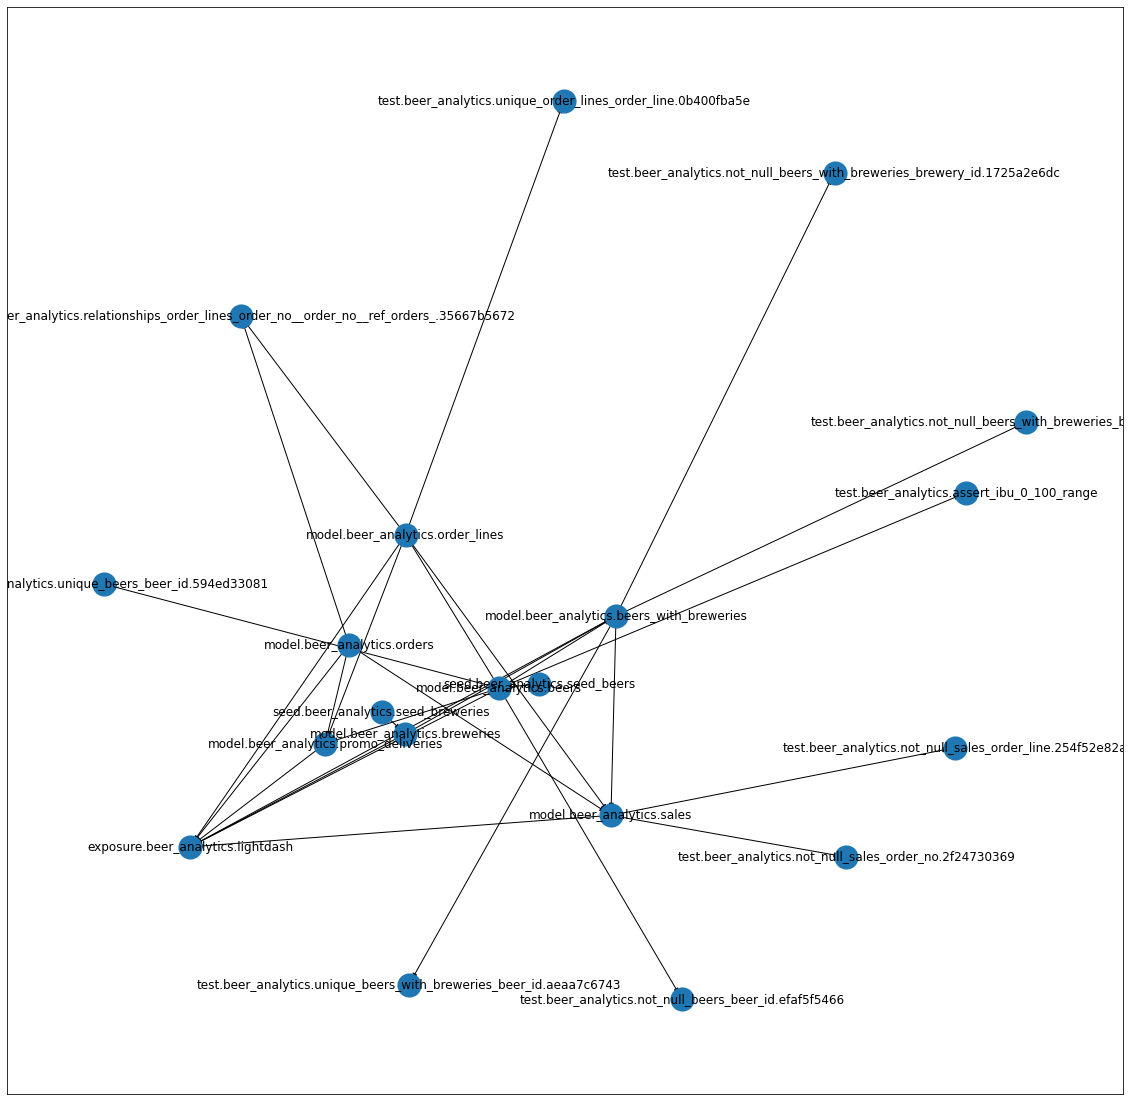

In [52]:
"""
Does not work:
g=net.Network(notebook=True)
g.from_nx(G)
g.show("example.html")
"""

plt.figure(figsize=(20, 20))
nx.draw_networkx(G, with_labels=True, node_size=200, alpha=1, linewidths=10)
plt.show()